In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
from sympy import * 

plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams.update({'font.size': 14})

In [2]:
dir = os.path.join('..', 'data', 'housing.data')

In [3]:
H = np.loadtxt(dir, dtype=np.float32)
A = H[:,:-1]
b = H[:,-1]

# 506 samples(houses), 13 attributes
print(A.shape, b.shape)

(506, 13) (506,)


In [4]:
# add bias term
A = np.pad(A, [(0,0),(0,1)], mode='constant', constant_values=1)
print(A.shape)

(506, 14)


In [5]:
# economy SVD
U, S, VT = np.linalg.svd(A, full_matrices=False)
S = np.diag(S)
x_tilde = VT.T @ np.linalg.inv(S) @ U.T @ b

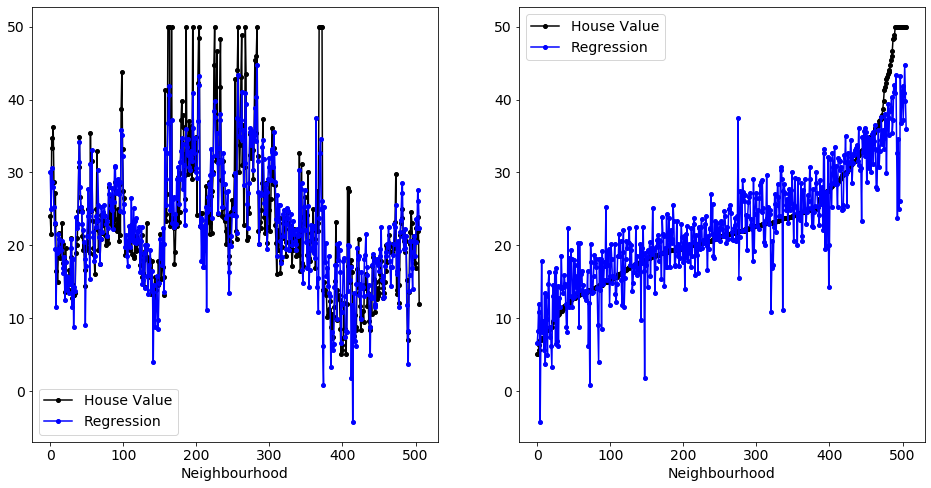

In [6]:
fig = plt.figure()

ax1 = fig.add_subplot(121) # nrows, ncols, index
plt.plot(b, '-o', c='k', linewidth=1.5, markersize=4, label='House Value')
plt.plot(A@x_tilde, '-o', c='b', linewidth=1.5, markersize=4, label='Regression')
plt.xlabel('Neighbourhood')
plt.legend()

ax2 = fig.add_subplot(122)
sort_ind = np.argsort(b)
b = b[sort_ind]
plt.plot(b, '-o', c='k', linewidth=1.5, markersize=4, label='House Value')
plt.plot(A[sort_ind,:]@x_tilde, '-o', c='b', linewidth=1.5, markersize=4, label='Regression')
plt.xlabel('Neighbourhood')
plt.legend()

plt.show()

In [7]:
A_mean = np.mean(A[:,:-1], axis=0)
# A_mean = A_mean.reshape(-1, 1)
print('A_mean')
print(A_mean)

# point-wise operation
A2 = A[:,:-1] - A_mean  # 0 mean
A2 = A2 / np.std(A2, axis=0) # use standard deviation to normalise
print('A2', A2.shape)

U, S, VT = np.linalg.svd(A2, full_matrices=False)
S = np.diag(S)
x = VT.T @ np.linalg.inv(S) @ U.T @ b
print('x', x.shape)
x_tick = list(range(1, x.shape[0]+1))
print('\nx_tick', x_tick)

A_mean
[3.6135232e+00 1.1363636e+01 1.1136797e+01 6.9169961e-02 5.5469555e-01
 6.2846355e+00 6.8574921e+01 3.7950428e+00 9.5494070e+00 4.0823715e+02
 1.8455584e+01 3.5667456e+02 1.2653064e+01]
A2 (506, 13)
x (13,)

x_tick [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]


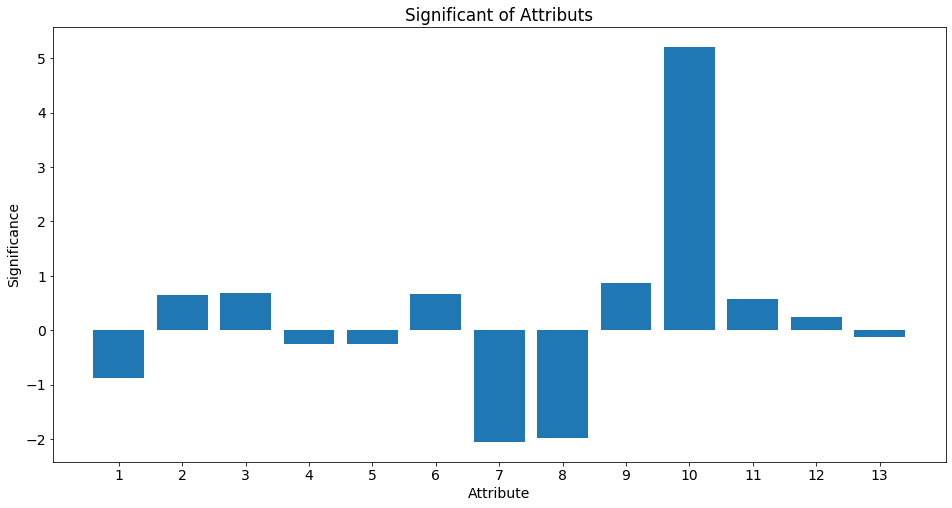

In [8]:
plt.figure()
plt.bar(x_tick, x)
plt.xlabel('Attribute')
plt.ylabel('Significance')
plt.xticks(x_tick)
plt.title('Significant of Attributs')
plt.show()

In [9]:
# split training and testing set

# 5:5 split
n = b.shape[0]
print('n', n)
n_train = int(np.round(0.5 * n))
print('n_train', n_train)

# shuffle data
p = np.random.permutation(n)
A = A[p, :]
b = b[p]

A_train = A[: n_train]
b_train = b[: n_train]
A_test = A[n_train:]
b_test = b[n_train:]

print(A_train.shape)
print(b_train.shape)
print(A_test.shape)
print(b_test.shape)

n 506
n_train 253
(253, 14)
(253,)
(253, 14)
(253,)


In [10]:
U, S, VT = np.linalg.svd(A_train, full_matrices=False)
S = np.diag(S)
x_tilde = VT.T @ np.linalg.inv(S) @ U.T @ b_train

pred_train = A_train @ x_tilde
pred_test = A_test @ x_tilde
print(pred_train.shape)
print(pred_test.shape)

(253,)
(253,)


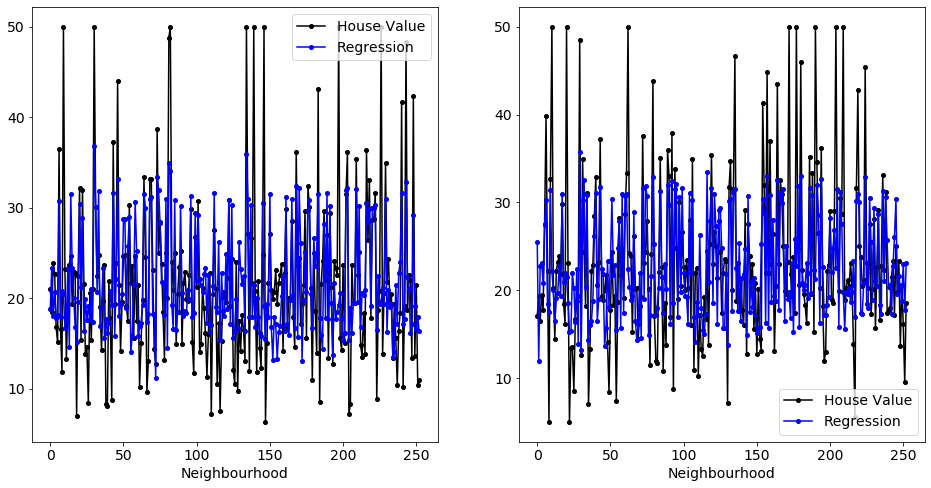

In [16]:
fig = plt.figure()

ax1 = fig.add_subplot(121) # nrows, ncols, index
plt.plot(b_train, '-o', c='k', linewidth=1.5, markersize=4, label='House Value')
plt.plot(pred_train, '-o', c='b', linewidth=1.5, markersize=4, label='Regression')
plt.xlabel('Neighbourhood')
plt.legend()

ax2 = fig.add_subplot(122)
plt.plot(b_test, '-o', c='k', linewidth=1.5, markersize=4, label='House Value')
plt.plot(pred_test, '-o', c='b', linewidth=1.5, markersize=4, label='Regression')
plt.xlabel('Neighbourhood')
plt.legend()

plt.show()

In [14]:
print(np.mean(b_train))
print(np.mean(pred_train))
print(np.mean(b_test))
print(np.mean(pred_test))
print(np.std(b_train))
print(np.std(pred_train))
print(np.std(b_test))
print(np.std(pred_test))

21.733202
21.733194
23.33241
22.643854
9.07582
5.7939053
9.2298355
5.8428473
